# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import folium
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading and Review Data

In [2]:
# Load data
df = pd.read_csv("dataset/london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
# Get the first n row
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# Get the last n row
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
# Melihat ringkasan dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Berdasarkan data diatas, menunjukkan dataset tersebut memiliki 13490604 baris dan 7 kolom dengan tipe data object dan int64. 

In [6]:
# Dimension dataset
df.shape

(13490604, 7)

# Preprocessing

Tidak terdapat data yang kosong pada dataset kejahatan di London.

In [7]:
# Check standard missing value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
# Check non standard missing value
missing_values = ["n/a", "na", "NaN"]
df = pd.read_csv("dataset/london_crime_by_lsoa.csv", na_values = missing_values)
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Menghapus kolom "lsoa_code" karena tidak dibutuhkan.

In [9]:
# Drop column
df.drop("lsoa_code", axis=1, inplace=True)

Mengganti nama kolom "value" menjadi "no_of_crimes" agar lebih spesifik.

In [10]:
# Rename column
df.rename(columns = {"value":"no_of_crimes"}, inplace=True)

Menghapus baris pada kolom "no_of_crimes" yang mempunyai nilai 0.

In [11]:
df = df[df["no_of_crimes"]!=0]

Cek kembali setelah dihapusnya nilai 0 pada kolom "no_of_crimes", menunjukkan bahwa jumlah baris saat ini berkurang dan menjadi 3419099 baris.

In [12]:
# Dimension dataset
df.shape

(3419099, 6)

In [13]:
df.head()

,borough,major_category,minor_category,no_of_crimes,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


# Visualization

In [14]:
# Using the style for the plot
plt.style.use("seaborn-whitegrid")

## Area Plot

In [15]:
# Pivoting the table
df_borough = pd.pivot_table(df,
                     index=["borough"],
                     columns=["year"],
                     aggfunc=np.sum,
                     fill_value=0)
df_borough_crimes = df_borough["no_of_crimes"]

# Add column total
df_borough_crimes["total"] = df_borough_crimes.sum(axis=1)

# Sort total in a descending order
df_borough_crimes.sort_values(by="total", ascending=False, inplace=True)
df_borough_crimes.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [16]:
# Get the top5
df_area_top = df_borough_crimes.head(2)

# Transpose the dataframe
df_area_top = df_area_top.transpose()

# Drop column "total"
df_area_top.drop("total", axis=0, inplace=True)

df_area_top

borough,Westminster,Lambeth
year,,
2008,47846,31717
2009,48456,31225
2010,48116,31671
2011,54243,33224
2012,59226,33473
2013,53852,31868
2014,47564,31765
2015,47395,33164
2016,48330,34071


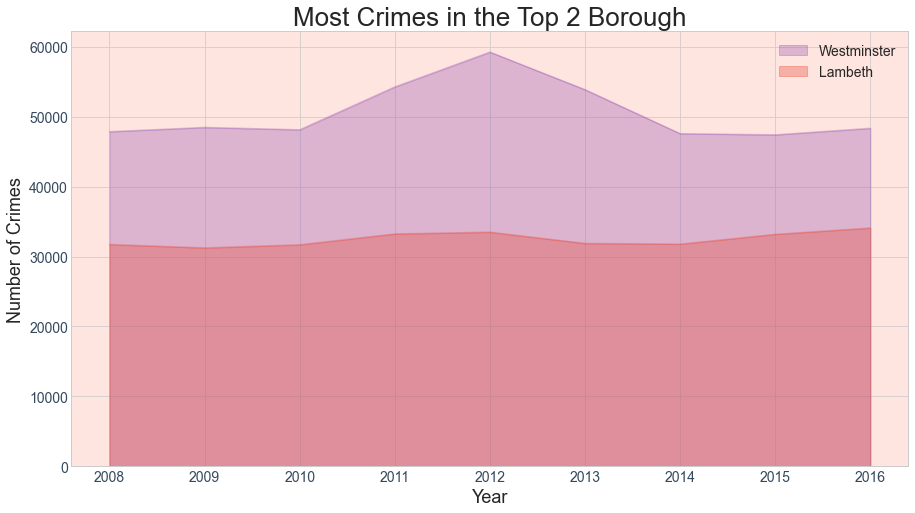

In [17]:
# Creating the Area Plot
my_colors = ["#9b59b6", "#e74c3c"]
df_area_top.plot(kind="area", alpha=0.35, stacked=False, figsize=(15,8), color=my_colors)
plt.title("Most Crimes in the Top 2 Borough",fontsize=26)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of Crimes", fontsize=18)
plt.xticks(color="#34495e",fontsize=14)
plt.yticks(color="#34495e",fontsize=14)
plt.legend(loc="best", fontsize=14)
ax = plt.axes()
ax.set_facecolor("#ffe5df")
plt.show()

Berdasarkan plot diatas, menunjukkan area plot yang memiliki total kejahatan tertinggi pada 2 Borough di London.
- Westminster dan Lambeth merupakan borough yang memiliki tingkat kejahatan tertinggi daripada wilayah lainnya.
- Di setiap tahunnya Westminster memiliki total kejahatan diatas 45000 dimana lebih banyak daripada borough lainnya di London. 
- Pada tahun 2012 Westminster memiliki tingkat kejahatan tertinggi dengan total kejahatan hampir mendekati angka 60000.
- Kejahatan tertinggi kedua yaitu Lambeth, yang memiliki total kejahatan kurang dari 35000 kasus.
- Pada tahun 2016 Westminster memiliki tingkat kejahatan tertinggi dengan total kejahatan 34071

In [18]:
# Get the top5
df_area_least = df_borough_crimes.tail(3)

# Transpose the Dataframe
df_area_least = df_area_least.transpose()

# Drop column "total"
df_area_least.drop("total", axis=0, inplace=True)
df_area_least

borough,Richmond upon Thames,Kingston upon Thames,City of London
year,,,
2008,11106,10661,0
2009,10618,10163,0
2010,10601,10171,0
2011,10896,10155,69
2012,11168,9956,157
2013,10439,9191,110
2014,10456,9288,115
2015,10413,9738,151
2016,11074,9983,178


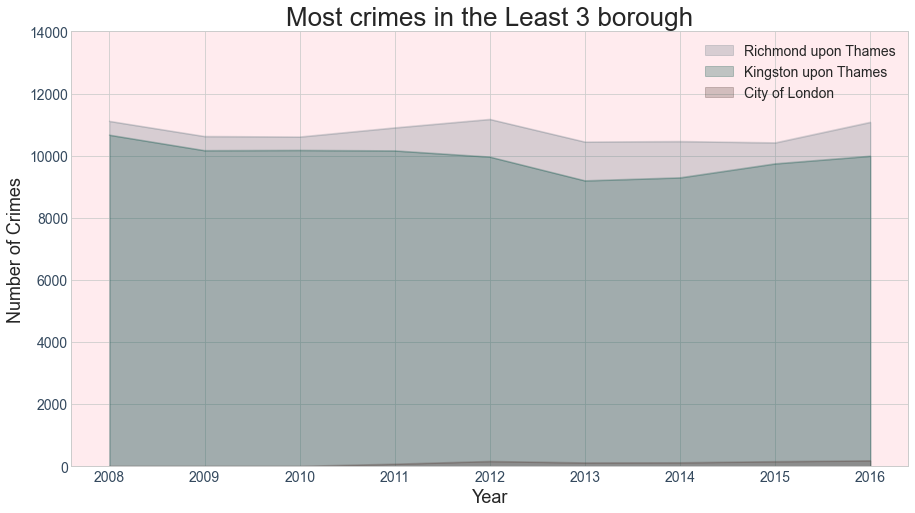

In [19]:
#creating the Area Plot
my_colors = ["#62757f", "#004d40", "#4e342e"]
df_area_least.plot(kind="area", alpha=0.25, stacked=False, figsize=(15, 8), color=my_colors)
plt.title("Most crimes in the Least 3 borough", fontsize=26)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of Crimes", fontsize=18)
plt.xticks(color="#34495e",fontsize=14)
plt.yticks(color="#34495e",fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.ylim(0, 14000)
ax = plt.axes()
ax.set_facecolor("#ffebee")
plt.show(block=True)

sBerdasarkan plot diatas, menunjukkan area plot yang memiliki total kejahatan terendah pada 3 Borough di London.
- Richmond upon Thames, Kingston upon Thames, dan City of London merupakan 3 borough yang memiliki tingkat kejahatan terendah daripada wilayah lainnya.
- Pada tahun 2012, Richmond upon Thames memiliki tingkat kejahatan tertinggi dengan total 11168 kasus. Serta pada tahun 2015 memiliki tingkat kejahatan terendah dengan total 10413 kasus.
- Pada tahun 2008, Kingston upon Thames memiliki tingkat kejahatan tertinggi dengan total 10661 kasus. Serta pada tahun 2013 memiliki tingkat kejahatan terendah dengan total 9191 kasus.
- Pada tahun 2008 hingga 2010 City of London tidak memiliki kasus kejahatan apapun. Sedangkan, kejahatan tertingginya terjadi pada tahun 2016 dengan total 178 kasus.

## Histograms

In [20]:
# Creating the dataset (take the last year 2016)
df_2016 = df_borough_crimes[[2016]]
df_2016.head()

year,2016
borough,
Westminster,48330
Lambeth,34071
Southwark,31636
Camden,29183
Newham,30090


In [21]:
#np.histograms returns 2 values
count, bin_edges = np.histogram(df_2016[2016])
print(count)
print(bin_edges)

[ 1  0  6  2 10  8  4  1  0  1]
[  178.   4993.2  9808.4 14623.6 19438.8 24254.  29069.2 33884.4 38699.6
 43514.8 48330. ]


Berdasarkan hasil diatas, menunjukkan pada tahun 2016:
- 1 Borough berkontribusi antara 178 hingga 4993.2 Crimes
- 0 Borough berkontribusi antara 4993.2 hingga 9808.4 Crimes
- 6 Borough berkontribusi antara 9808.4 hingga 14623.6 Crimes

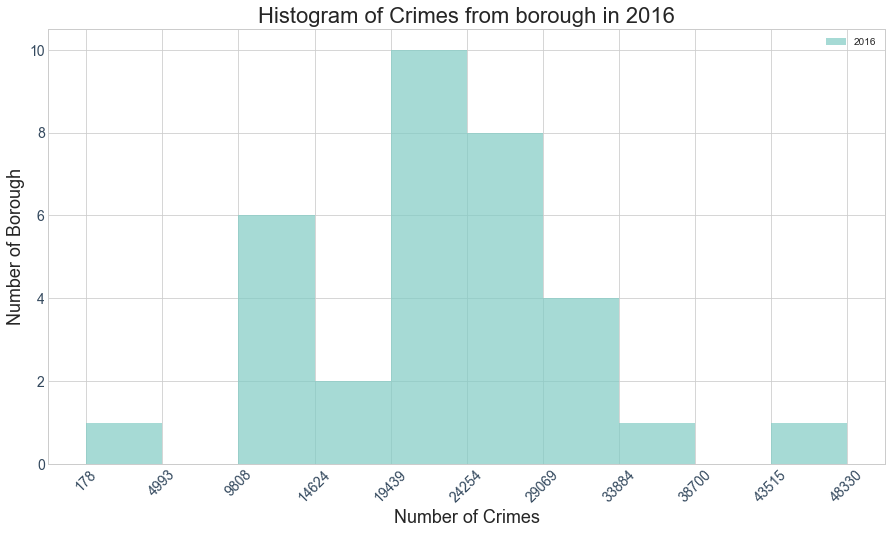

In [22]:
# Creating the Histograms
df_2016.plot(kind="hist", figsize=(15, 8), bins=10, xticks=bin_edges, alpha=0.7, color="#80cbc4")
plt.title("Histogram of Crimes from borough in 2016", fontsize=22)
plt.xlabel("Number of Crimes", fontsize=18)
plt.ylabel("Number of Borough", fontsize=18)
plt.xticks(color="#34495e",fontsize=14, rotation=45)
plt.yticks(color="#34495e",fontsize=14)
plt.legend(loc="best")

plt.show()

Berdasarkan plot diatas, sumbu X menunjukkan kisaran kejahatan dalam interval 48330. Dan Sumbu Y mewakili jumlah wilayah (Borough) yang terdapat kejahatan.

In [23]:
# Creating the dataset
df_hist2 = df_borough_crimes.transpose()
df_hist2 = df_hist2[["Sutton", "Richmond upon Thames", "Kingston upon Thames" ]]
df_hist2.drop(df_hist2.loc["total"].name,  inplace=True)
df_hist2

borough,Sutton,Richmond upon Thames,Kingston upon Thames
year,,,
2008,12943,11106,10661
2009,12240,10618,10163
2010,12032,10601,10171
2011,11068,10896,10155
2012,10948,11168,9956
2013,10057,10439,9191
2014,10443,10456,9288
2015,10598,10413,9738
2016,10658,11074,9983


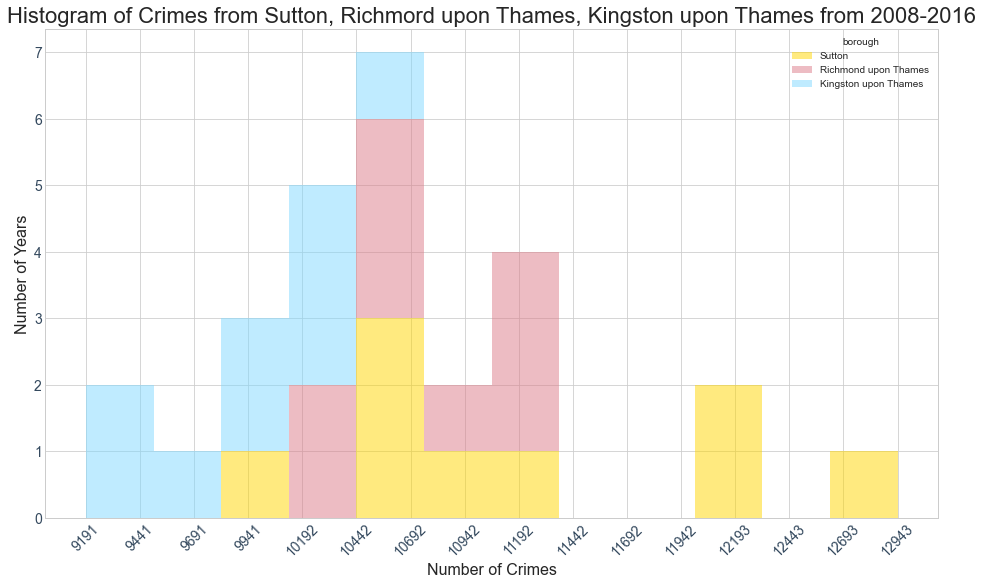

In [24]:
count, bin_edges = np.histogram(df_hist2, 15)

# Creating the Histograms
df_hist2.plot(kind="hist", 
              alpha=0.5, 
              bins=12, 
              figsize=(16, 9),
              stacked=True, 
              color=["gold", "#dd7b88", "#80d8ff"])
plt.title("Histogram of Crimes from Sutton, Richmord upon Thames, Kingston upon Thames from 2008-2016", fontsize=22)
plt.xlabel("Number of Crimes", fontsize=16)
plt.ylabel("Number of Years", fontsize=16)
plt.xticks(ticks=bin_edges, rotation=45, color="#34495e", fontsize=14)
plt.yticks(color="#34495e",fontsize=14)

plt.show()


Berdasarkan plot diatas, sumbu X menunjukkan kisaran kejahatan dalam interval 12943 dan sumbu Y mewakili rentang tahun kejahatan

## Line Plot

In [25]:
df_year = pd.DataFrame(df_borough_crimes)

# Transpose the dataframe
df_year = df_year.transpose()

# Drop column total
df_year.drop("total", axis=0, inplace=True)

# Add column total
df_year["total"] = df_year.sum(axis=1)

# Get column total
df_year = df_year[["total"]]

df_year

borough,total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


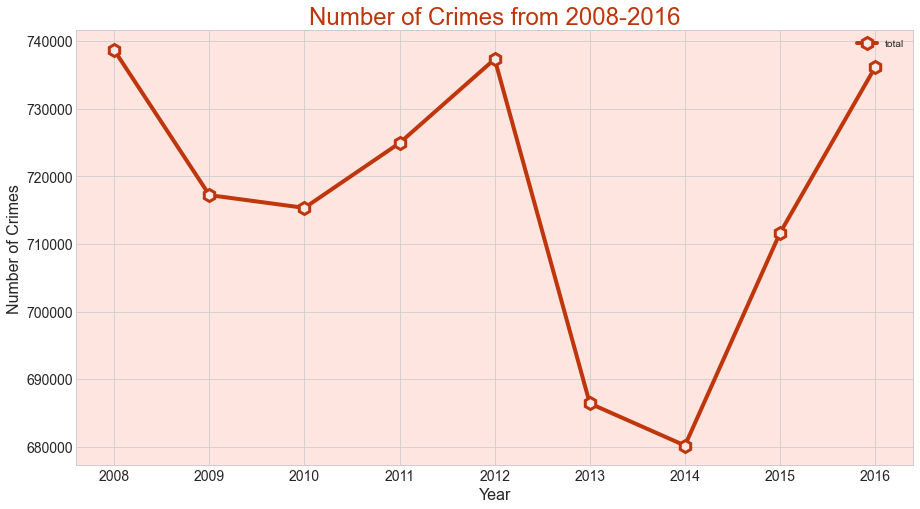

In [26]:
# Creating the Line Plot
df_year.plot(kind="line", figsize=(15,8), color="#bf360c", linewidth=4,  
             marker='h', 
             markerfacecolor='#fbe9e7',
             markeredgewidth=3,
             markersize=12, 
             markevery=1)

plt.title("Number of Crimes from 2008-2016", color="#bf360c", fontsize=24)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="best")
ax = plt.axes()
ax.set_facecolor("#ffe5df")

plt.show()

Pada plot diatas, sumbu x menunjukkan rentang tahun kejahatan di London, dan sumbu Y menunjukkan total kejahatan di London.
- Jumlah kejahatan tertinggi di setiap tahunnya ada pada tahun 2008, dengan total 738641 kasus.
- Jumlah kejahatan paling sedikit disetiap tahunnya ada pada tahun 2014, dengan total 680000 kasus.

## Bar Chart

In [27]:
# Creating dataset
df_major_crimes = df_borough_crimes[["total"]]
df_major_crimes.reset_index(inplace=True)
df_major_crimes.head()

year,borough,total
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


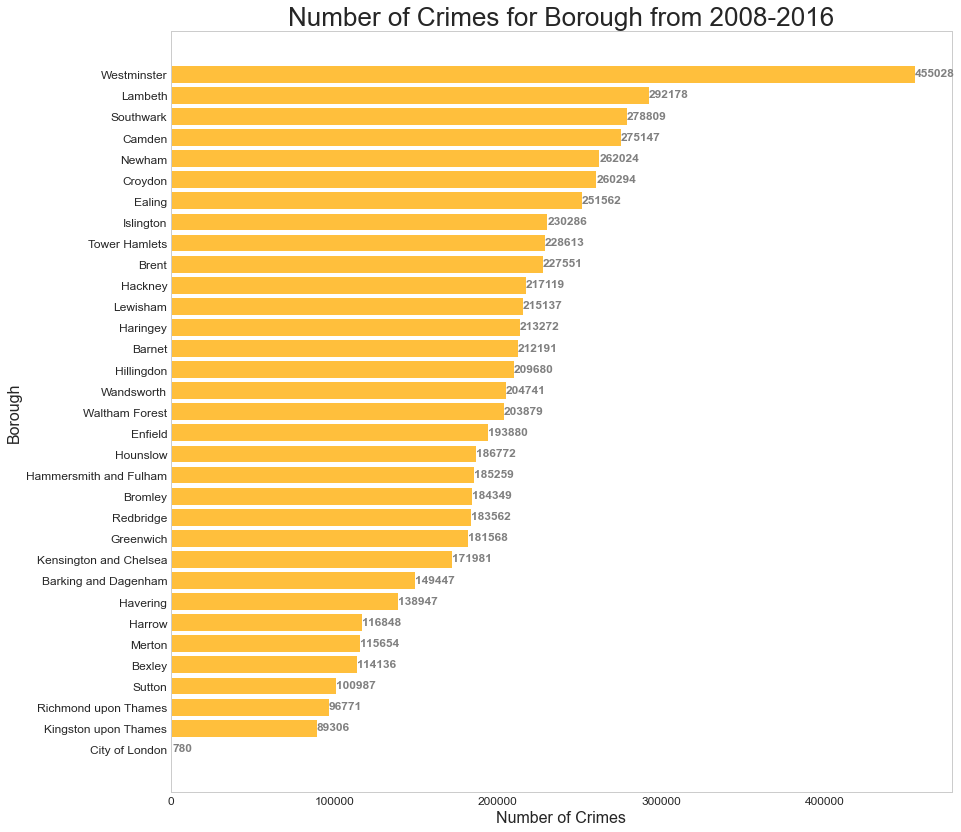

In [28]:
x = df_major_crimes["borough"]
y = df_major_crimes["total"]

# Figure Size
fig, ax = plt.subplots(figsize = (14, 14))

# Horizontal Bar Plot
barh = ax.barh(x, y, color="#ffbf3c")
ax.set_title("Number of Crimes for Borough from 2008-2016", fontsize=26)
ax.set_xlabel("Number of Crimes", fontsize=16)
ax.set_ylabel("Borough", fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_facecolor(color="white")

# Show top values
ax.invert_yaxis()

# Add x, y gridlines
ax.grid(False)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()-0.3, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 12, color = "gray", fontweight = "bold")
    
plt.show()

Berdasarkan plot diatas, menunjukkan total kejahatan di wilayah London dari tahun 2008 hingga tahun 2016.
- Westminster memiliki tingkat kejahatan tertinggi di London daripada wilayah lainnya dengan total kejahatan 455028.
- Tingkat kejahatan terendah ada pada wilayah City of London dengan total kejahatan 780.

In [29]:
# Creating the dataset
df_borough_top = df_major_crimes.head(5)
x = df_borough_top["borough"]
y = df_borough_top["total"]

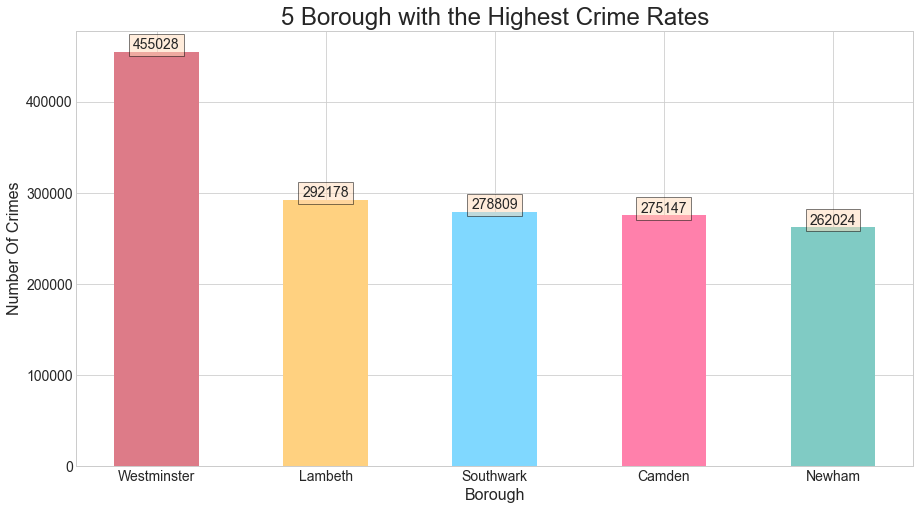

In [30]:
# Figure size
fig = plt.figure(figsize = (15, 8))

# Add colors
colors = ["#dd7b88","#ffd180","#80d8ff","#ff80ab", "#80cbc4"]

# Creating the bar plot
plt.bar(x, y, color=colors, width = 0.5)

# Add value labels
for i in range(len(df_borough_top["total"])):
    plt.text(i, df_borough_top["total"][i], df_borough_top["total"][i], ha="center", va="bottom", fontsize=14, 
             Bbox=dict(facecolor="peachpuff", alpha=.5))

plt.title("5 Borough with the Highest Crime Rates", fontsize=24)
plt.xlabel("Borough\n", fontsize = 16)
plt.ylabel("Number Of Crimes", fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Pada plot diatas menunjukkan 5 Borough yang memiliki jumlah kejahatan tertinggi. Sumbu X merupakan nama borough di London. Dan sumbu Y merupakan total dari kejahatan.
- Lima (5) wilayah dengan kejahatan tertinggi yaitu Westminster, Lambeth, Southwark, Camden, dan Newham.
- Wilayah Westminster memiliki tingkat kejahatan tertinggi daripada wilayah lainnya, dengan total kejahatan 455028.
- Kejahatan selanjutnya ada pada wilayah Lambeth (292178 kejahatan), Southwark (278809 kejahatan), Camden dan Newham (275147  Kejahatan), dimana total kejahatan pada wilayah-wilayah tersebut berada di bawah 300000.

In [31]:
# creating the dataset
df_major = pd.pivot_table(df,
                     index=["major_category"],
                     columns=["borough"],
                     aggfunc=np.sum,
                     fill_value=0)
df_major = df_major["no_of_crimes"]
df_major["total"] = df_major.sum(axis=1)
df_major.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,total
major_category,,,,,,,,,,,,,,,,,,,,,
Burglary,18103,36981,14973,28923,27135,27939,15,33376,30831,30213,...,25356,26735,16097,27980,13207,21510,25565,25533,29295,754293
Criminal Damage,18888,21024,17244,20569,24039,18482,16,31218,25613,22487,...,24177,17543,11722,24450,14474,21593,20459,19630,20405,630938
Drugs,9188,9796,7346,25978,8942,21816,33,19162,18591,13251,...,18389,15736,4707,27381,4586,23408,14101,9493,34031,470765
Fraud or Forgery,205,175,106,157,196,123,0,270,175,132,...,323,284,37,321,57,124,236,161,273,5325
Other Notifiable Offences,2819,2953,1999,3711,2637,3857,17,4340,4406,3293,...,4456,2619,1420,4696,1393,4268,3040,3091,6148,106349


In [32]:
df_westminster = df_major[["Westminster"]].sort_values("Westminster", ascending=False)
df_lambeth = df_major[["Lambeth"]].sort_values("Lambeth", ascending=False)
df_southwark = df_major[["Southwark"]].sort_values("Southwark", ascending=False)
df_camden = df_major[["Camden"]].sort_values("Camden", ascending=False)
df_newham = df_major[["Newham"]].sort_values("Newham", ascending=False)
df_croydon = df_major[["Croydon"]].sort_values("Croydon", ascending=False)

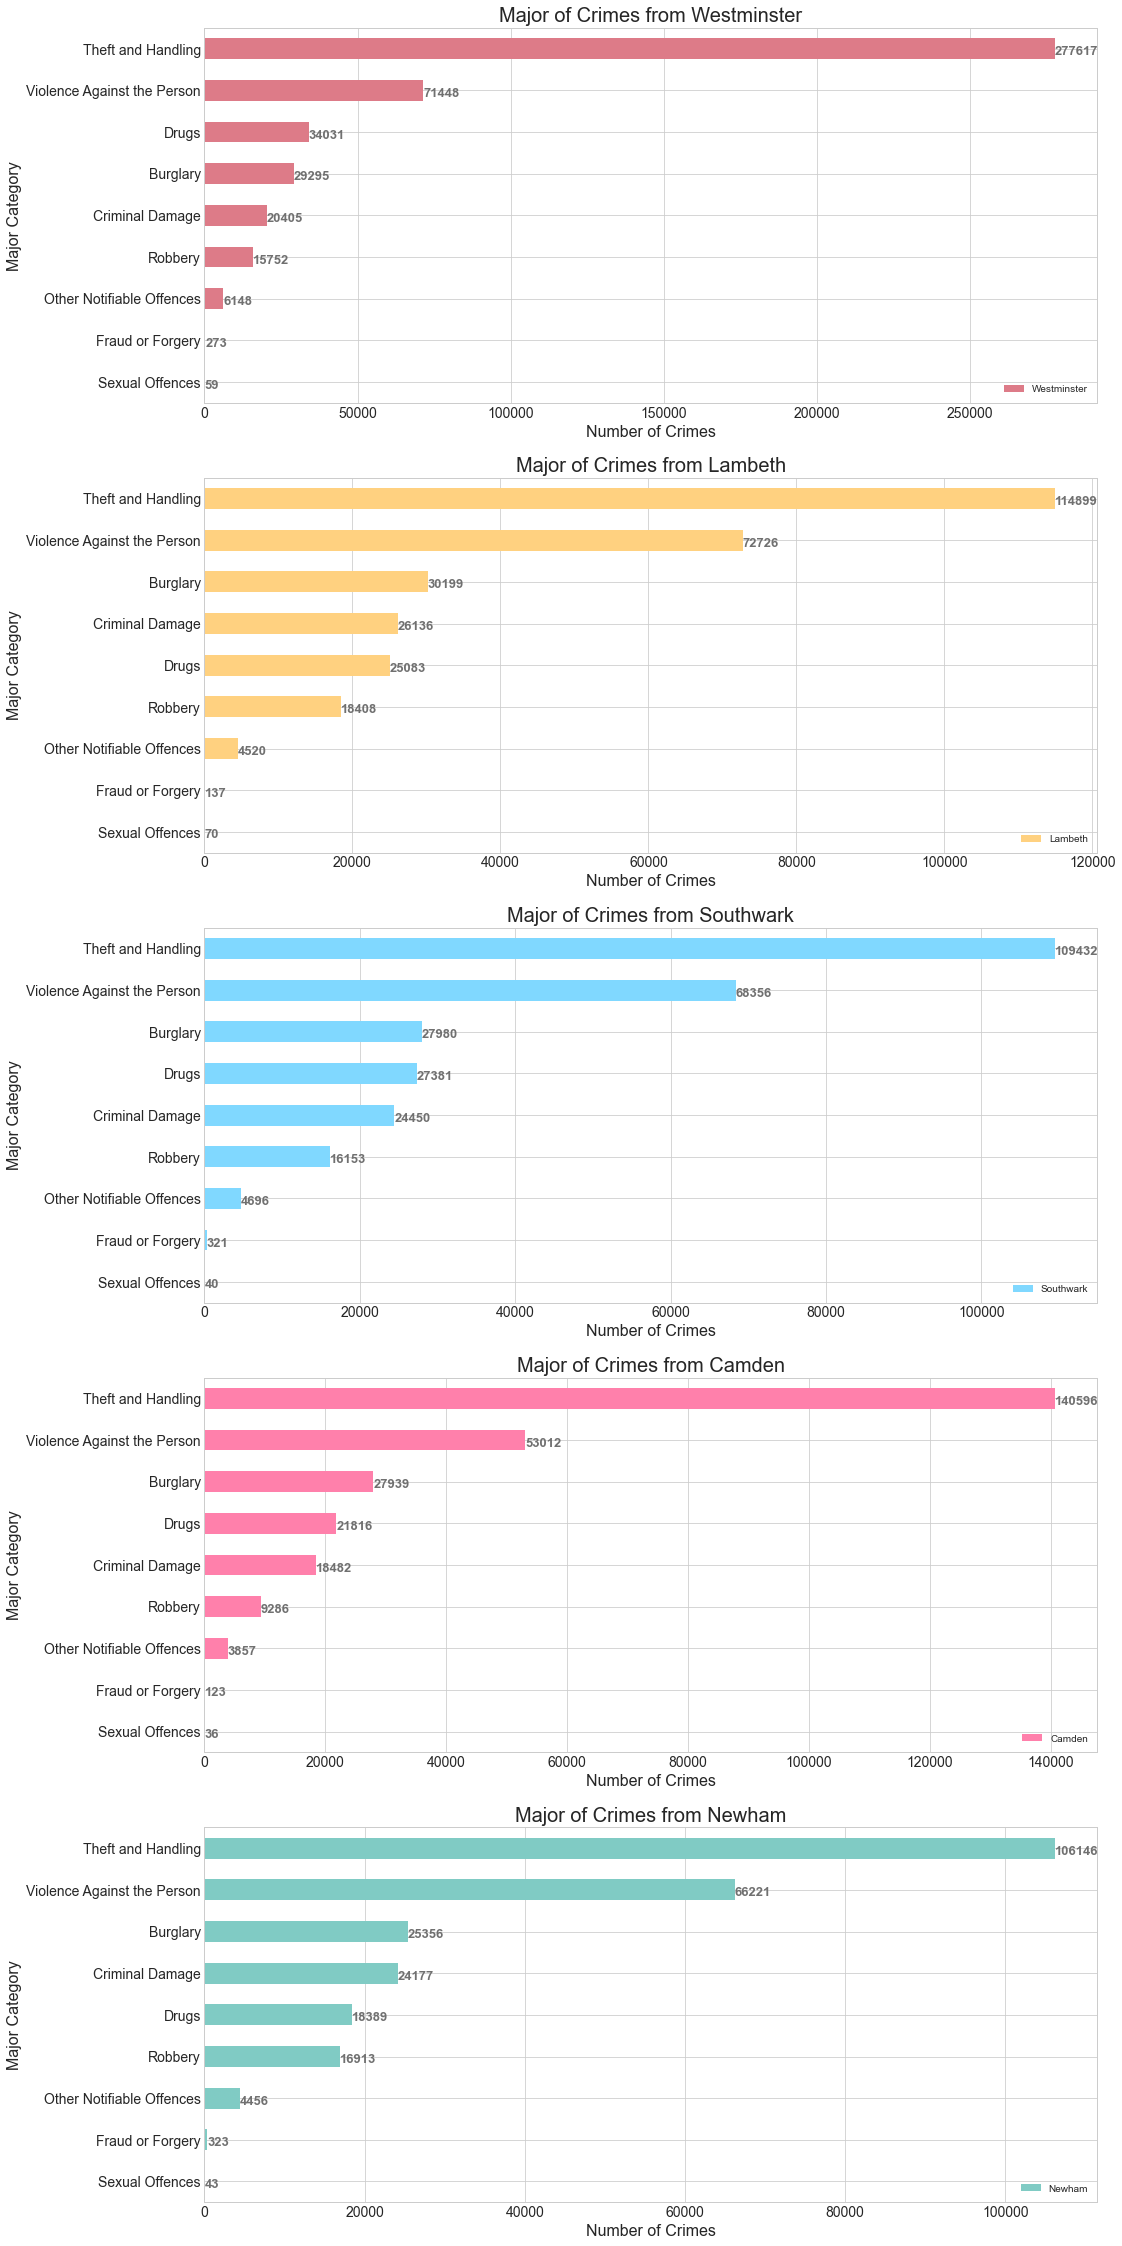

In [33]:
# Creatiing the box plot vs line plot
fig = plt.figure(figsize=(16, 40))
plt1 = fig.add_subplot(511) # (1 row, 2 columns, first plot)
plt2 = fig.add_subplot(512) # (1, row, 2 columns, second plot)
plt3 = fig.add_subplot(513) # (1, row, 2 columns, second plot)
plt4 = fig.add_subplot(514) # (1, row, 2 columns, second plot)
plt5 = fig.add_subplot(515) # (1, row, 2 columns, second plot)

# Subplot 1
plt1 = df_westminster.plot(kind="barh", ax=plt1, fontsize=14, color="#dd7b88")
plt1.set_title("Major of Crimes from Westminster", fontsize=20)
plt1.set_xlabel("Number of Crimes", fontsize=16)
plt1.set_ylabel("Major Category", fontsize=16)
plt1.legend(loc ="lower right")
plt1.invert_yaxis()
# Add annotation to bars
for i in plt1.patches:
    plt1.text(i.get_width()-0.3, i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize = 13, color = "#707070", fontweight = "bold")

# Subplot 2
df_lambeth.plot(kind="barh", ax=plt2, fontsize=14, color="#ffd180")
plt2.set_title("Major of Crimes from Lambeth", fontsize=20)
plt2.set_xlabel("Number of Crimes", fontsize=16)
plt2.set_ylabel("Major Category", fontsize=16)
plt2.legend(loc ="lower right")
plt2.invert_yaxis()
for i in plt2.patches:
    plt2.text(i.get_width()-0.3, i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize = 13, color = "#707070", fontweight = "bold")

# Subplot 3
df_southwark.plot(kind="barh", ax=plt3, fontsize=14,  color="#80d8ff")
plt3.set_title("Major of Crimes from Southwark", fontsize=20)
plt3.set_xlabel("Number of Crimes", fontsize=16)
plt3.set_ylabel("Major Category", fontsize=16)
plt3.legend(loc ="lower right")
plt3.invert_yaxis()
for i in plt3.patches:
    plt3.text(i.get_width()-0.3, i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize = 13, color = "#707070", fontweight = "bold")

# Subplot 4
df_camden.plot(kind="barh", ax=plt4, fontsize=14,  color="#ff80ab")
plt4.set_title("Major of Crimes from Camden", fontsize=20)
plt4.set_xlabel("Number of Crimes", fontsize=16)
plt4.set_ylabel("Major Category", fontsize=16)
plt4.legend(loc ="lower right")
plt4.invert_yaxis()
for i in plt4.patches:
    plt4.text(i.get_width()-0.3, i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize = 13, color = "#707070", fontweight = "bold")

# Subplot 5
df_newham.plot(kind="barh", ax=plt5, fontsize=14, color="#80cbc4")
plt5.set_title("Major of Crimes from Newham", fontsize=20)
plt5.set_xlabel("Number of Crimes", fontsize=16)
plt5.set_ylabel("Major Category", fontsize=16)
plt5.legend(loc ="lower right")
plt5.invert_yaxis()
for i in plt5.patches:
    plt5.text(i.get_width()-0.3, i.get_y()+0.4, str(round((i.get_width()), 2)), fontsize = 13, color = "#707070", fontweight = "bold")


plt.show()

Berdasarkan plot diatas, menunjukkan kategori kejahatan dari 5 Borough (wilayah) yang memiliki tingkat kejahatan tertinggi di London. Pada kelima wilayah tersebut juga terlihat bahwa Theft and Handling (Pencurian dan Penanganan) merupakan kejahatan tertinggi dan Sexual Offences (Pelanggaran Seksual) merupakan kejahatan terendah.

In [34]:
# Creating the dataset
df_mc = df_major[["total"]]
df_mc = df_mc.sort_values("total", ascending=False)
df_mc.reset_index(inplace=True)
df_mc

borough,major_category,total
0,Theft and Handling,2661861
1,Violence Against the Person,1558081
2,Burglary,754293
3,Criminal Damage,630938
4,Drugs,470765
5,Robbery,258873
6,Other Notifiable Offences,106349
7,Fraud or Forgery,5325
8,Sexual Offences,1273


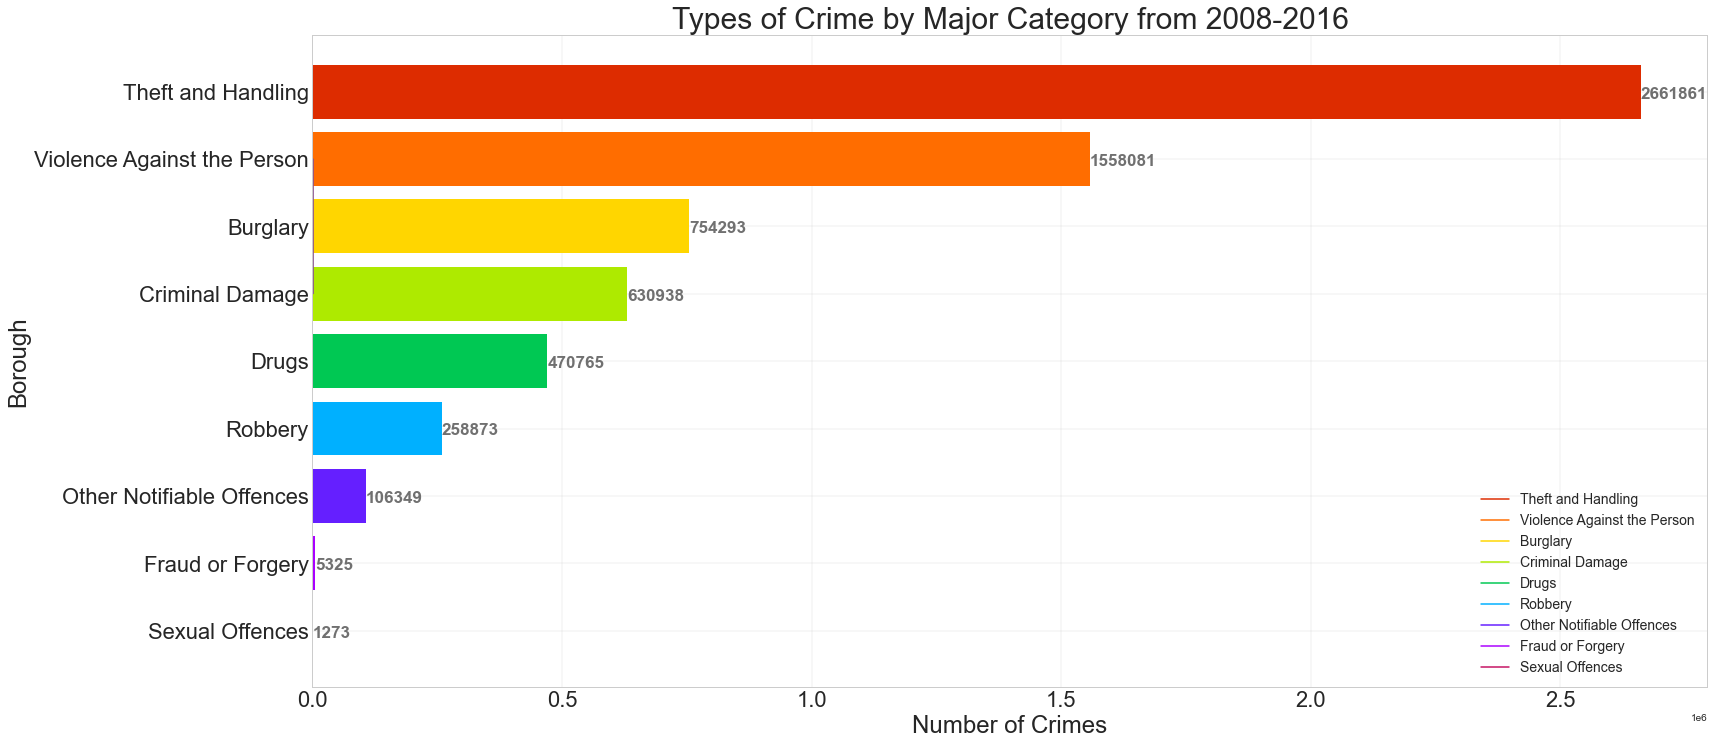

In [35]:
x = df_mc["major_category"]
y = df_mc["total"]

# Figure Size
fig, ax = plt.subplots(figsize = (25, 12))

line1, = ax.plot([1, 2, 3], label="Theft and Handling", color="#DD2C00")
line2, = ax.plot([1, 2, 3], label="Violence Against the Person", color="#FF6D00")
line3, = ax.plot([1, 2, 3], label="Burglary", color="#FFD600")
line4, = ax.plot([1, 2, 3], label="Criminal Damage", color="#AEEA00")
line5, = ax.plot([1, 2, 3], label="Drugs", color="#00C853")
line6, = ax.plot([1, 2, 3], label="Robbery", color="#00B0FF")
line7, = ax.plot([1, 2, 3], label="Other Notifiable Offences", color="#651FFF")
line8, = ax.plot([1, 2, 3], label="Fraud or Forgery", color="#AA00FF")
line9, = ax.plot([1, 2, 3], label="Sexual Offences", color="#C51162")

# Add Color
colors = ["#DD2C00", "#FF6D00", "#FFD600", "#AEEA00", "#00C853", "#00B0FF", "#651FFF", "#AA00FF", "#C51162"]
# Horizontal Bar Plot
ax.barh(x, y, color=colors)
ax.set_title("Types of Crime by Major Category from 2008-2016", fontsize=30)
ax.set_ylabel("Borough", fontsize=24)
ax.set_xlabel("Number of Crimes", fontsize=24)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
ax.legend(handles=[line1, line2, line3, line4, line5, line6, line7, line8, line9], loc="lower right", fontsize=14)

# Show top values
ax.invert_yaxis()

# Add x, y gridlines
ax.grid(b = True, color ="gray", linestyle ="-", linewidth = 0.3, alpha = 0.4)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()-0.3, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 17, color = "#707070", fontweight = "bold")
    
plt.show()

Berdasarkan plot diatas, menunjukkan tingkat kejahatan berdasarkan "Major Category" dari tahun 2008 hingga 2016.
- Theft and Handling memiliki tingkat kejahatan tertinggi daripada kejahatan lainnya dengan total 5323722 kasus.
- Violence Against the Person memiliki tingkat kejahatan dengan total 3116162 kasus.
- Burglary memiliki tingkat kejahatan dengan total 1508586 kasus.
- Criminal Damage memiliki tingkat kejahatan dengan total 1261876 kasus.
- Drugs memiliki memiliki tingkat kejahatan dengan total 941530 kasus.
- Robbery memiliki tingkat kejahatan dengan total 517746 kasus.
- Other Notifiable Offences memiliki tingkat kejahatan dengan total 212698 kasus.
- Fraud or Forgery memiliki tingkat kejahatan dengan total 10650 kasus.
- Sexual Offences memiliki tingkat kejahatan terendah dengan total 2546 kasus.

In [36]:
# Creating the dataset
df_sex_o = df_major.loc[["Sexual Offences"]]
df_sex_o = df_sex_o.transpose()
df_sex_o.drop(df_sex_o.loc["total"].name,  inplace=True)
df_sex_o.reset_index(inplace=True)
df_sex_o = df_sex_o.sort_values("Sexual Offences", ascending=False)
df_sex_o.head()

major_category,borough,Sexual Offences
22,Lewisham,71
21,Lambeth,70
32,Westminster,59
10,Greenwich,56
7,Croydon,55


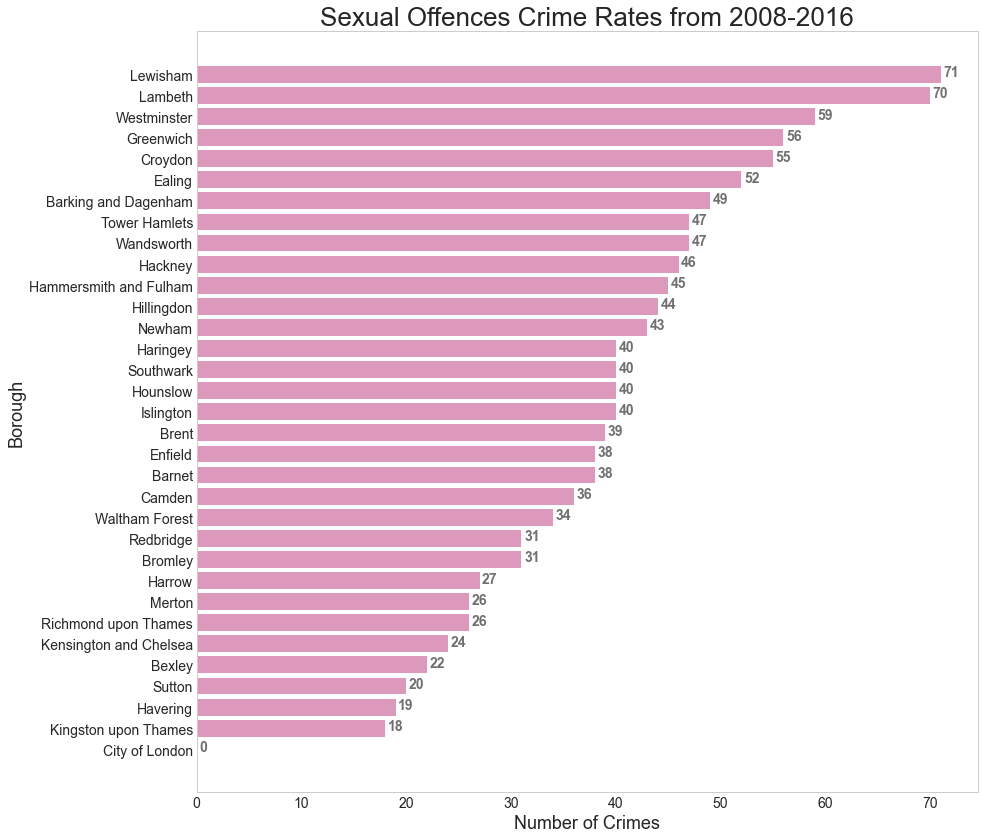

In [37]:
x = df_sex_o["borough"]
y = df_sex_o["Sexual Offences"]

# Figure Size
fig, ax = plt.subplots(figsize = (14, 14))

# Horizontal Bar Plot
barh = ax.barh(x, y, color="#dd99bb")
ax.set_title("Sexual Offences Crime Rates from 2008-2016", fontsize=26)
ax.set_xlabel("Number of Crimes", fontsize=18)
ax.set_ylabel("Borough", fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Show top values
ax.invert_yaxis()

# Add x, y gridlines
ax.grid(False)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.25, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 14, color = "#707070", fontweight = "bold")
    
plt.show()

Berdasarkan plot diatas, menunjukkan tingkat kejahatan Sexual Offences pada masing-masing wilayah.
- Sexual Offences (Pelanggaran Seksual) merupakan kategori kejahatan terendah daripada kejahatan lainnya.
- Lewisham merupakan wilayah yang memiliki kejahatan "Sexual Offences" tertinggi di London dengan total 71 kasus.
- City of London merupakan wilayah yang tidak memiliki kasus kejahatan pada "Sexual Offences".

In [38]:
# Creating the dataset
df_minor = df_borough = pd.pivot_table(df, index=["borough"], columns=["minor_category"], aggfunc=np.sum, fill_value=0)
df_minor = df_minor["no_of_crimes"].transpose()
df_minor["total"] = df_minor.sum(axis=1)
df_minor.sort_values("total", ascending=False, inplace=True)
df_minor.reset_index(inplace=True)
df_minor[["minor_category", "total"]]

borough,minor_category,total
0,Other Theft,980085
1,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
3,Harassment,458124
4,Assault with Injury,451001
5,Possession Of Drugs,431948
6,Common Assault,413690
7,Theft From Shops,345142
8,Other Theft Person,308842
9,Criminal Damage To Motor Vehicle,265463


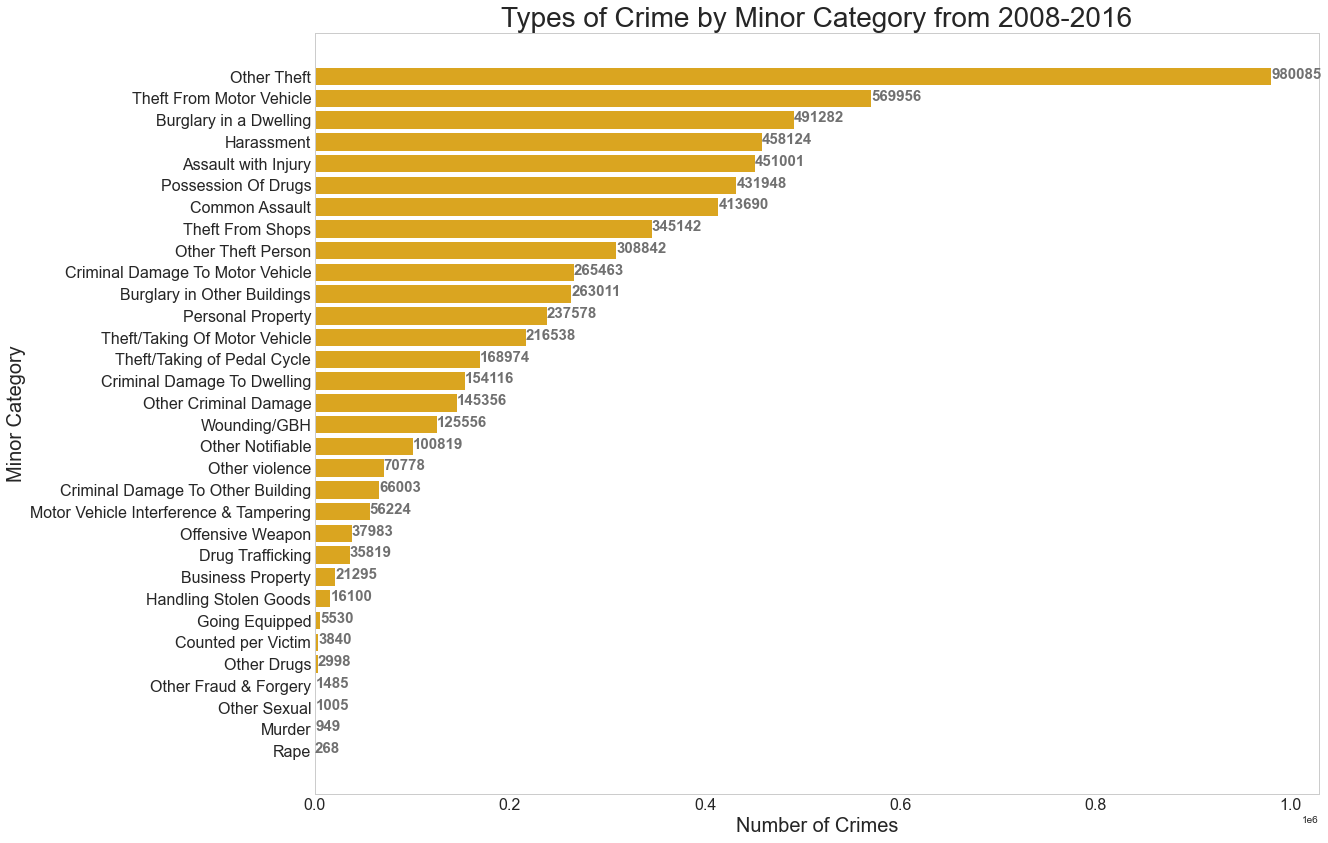

In [39]:
x = df_minor["minor_category"]
y = df_minor["total"]

# Figure Size
fig, ax = plt.subplots(figsize = (18, 14))

# Horizontal Bar Plot
barh = ax.barh(x, y, color="#DAA520")
ax.set_title("Types of Crime by Minor Category from 2008-2016", fontsize=28)
ax.set_xlabel("Number of Crimes", fontsize=20)
ax.set_ylabel("Minor Category", fontsize=20)
ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=16)

# Show top values
ax.invert_yaxis()

# Add x, y gridlines
ax.grid(False)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.25, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 15, color = "#707070", fontweight = "bold")
    
plt.show()

Berdasarkan plot diatas, menunjukkan tingkat kejahatan berdasarkan "Minor Category" dari tahun 2008 hingga 2016.
- Kategori Other Theft (Pencurian lainnya) memiliki tingkat kejahatan dengan total 980085 kasus.
- Sedangkan, tiga kejahatan terendah lainnya adalah Other Sexual (1005 kasus), Murder (949 kasus), dan Rape (268 kasus).

## Pie Chart

In [40]:
# Creating the dataset
df_crimes = pd.DataFrame(df_major)
df_crimes["total"] = df_crimes.sum(axis=1)
df_crimes = df_crimes[["total"]]
df_crimes = df_crimes.sort_values(by="total", ascending=False).head(5)
df_crimes

borough,total
major_category,
Theft and Handling,5323722
Violence Against the Person,3116162
Burglary,1508586
Criminal Damage,1261876
Drugs,941530


In [41]:
# Convert DataFrame to array numpy
arr = pd.DataFrame(df_crimes).to_numpy()
print(arr.shape)

# Multiplying arrays
result_ = arr.ravel()
print(result_.shape)

(5, 1)
(5,)


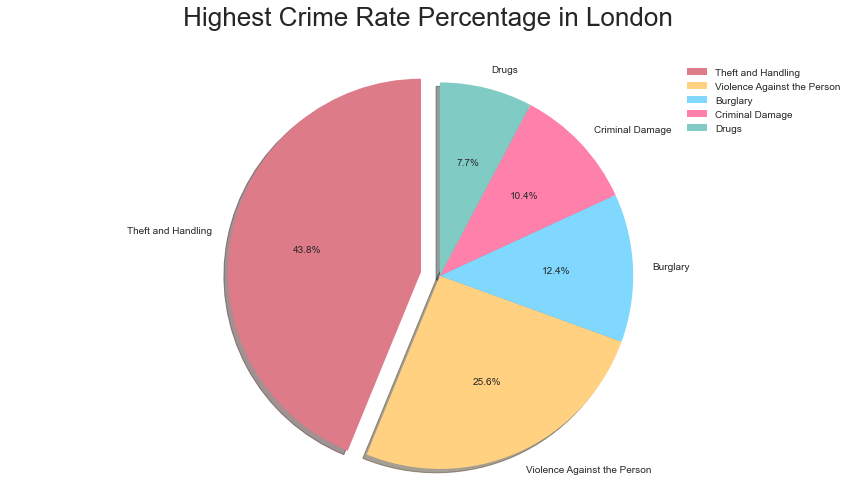

In [42]:
# Labels
my_labels = ["Theft and Handling", "Violence Against the Person", "Burglary", "Criminal Damage", "Drugs"]

# add colors
colors = ["#dd7b88","#ffd180","#80d8ff","#ff80ab", "#80cbc4"]

# Creating the pie chart
fig = plt.figure(figsize =(12, 7))
explode = (0.1, 0, 0, 0, 0)
plt.pie(result_, explode=explode, labels=my_labels, shadow=True, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Highest Crime Rate Percentage in London\n", fontsize=26)
plt.legend(loc="best")
plt.axis("equal")
plt.tight_layout()

plt.show()

Berdasarkan plot diatas, menunjukkan persentase 5 kejahatan tertinggi di London.
- Kejahatan tertinggi pada wilayah di London yaitu pencurian dan penanganan (Theft and Handling) dengan 43,8%.
- Kejahatan tertinggi lainnya yaitu kekerasan terhadap seseorang (Violence Against the Person) dengan total 25,6%, pencurian (Burglary) dengan total 12,4%, kerusakan kriminal(Criminal Damage) dengan total 10,4%, narkoba (Drugs) dengan total 7,7%.

## Box Plot

In [43]:
# Creating the dataset
df_bp = pd.DataFrame(df_borough_crimes)
df_bp.drop("total", axis=1, inplace=True)
df_bp = df_bp.transpose()
df_bp = df_bp[["Newham", "Croydon"]]
df_bp.describe()

borough,Newham,Croydon
count,9.000000,9.000000
mean,29113.777778,28921.555556
std,1119.162385,1066.579241
min,27577.000000,27357.000000
25%,28005.000000,28089.000000
50%,29217.000000,29373.000000
75%,30067.000000,29784.000000
max,30728.000000,30189.000000


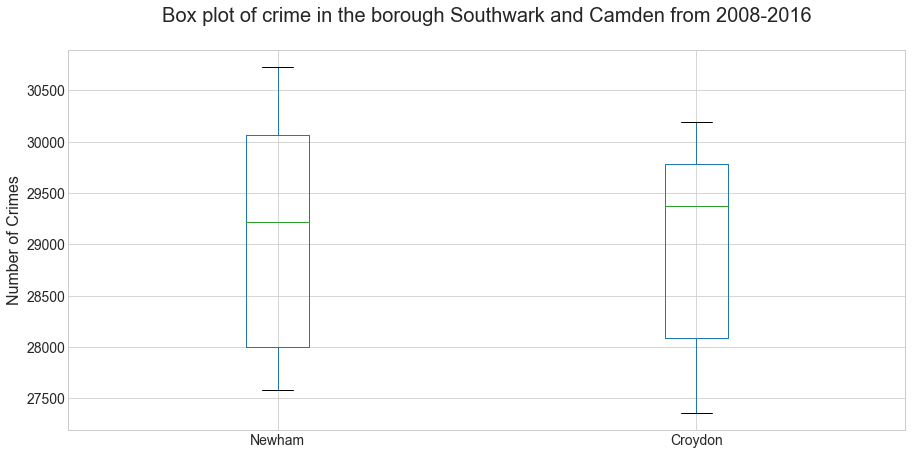

In [44]:
# Creating the Box Plot
df_bp.plot(kind="box", figsize=(15, 7))
plt.title("Box plot of crime in the borough Southwark and Camden from 2008-2016\n", fontsize=20)
plt.ylabel("Number of Crimes", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Berdasarkan plot diatas, menunjukkan tingkat kejahatan pada Newham dan Croydon memiliki total kejahatan yang hampir sama 
- Rata-rata tingkat kejahatan pada Newham dan Croydon memiliki total kasus yang hampir mendekati, yaitu Newham sebanyak 29217, dan Croydon sebanyak 29373.
- Range crimes pada wilayah Newham lebih tersebar daripada Croydon.
- Tingkat kejahatan maksimum di setiap tahunnya pada Newham adalah 30728 kasus, jumlah itu lebih besar daripada Croydon yang hanya 30189 kasus.

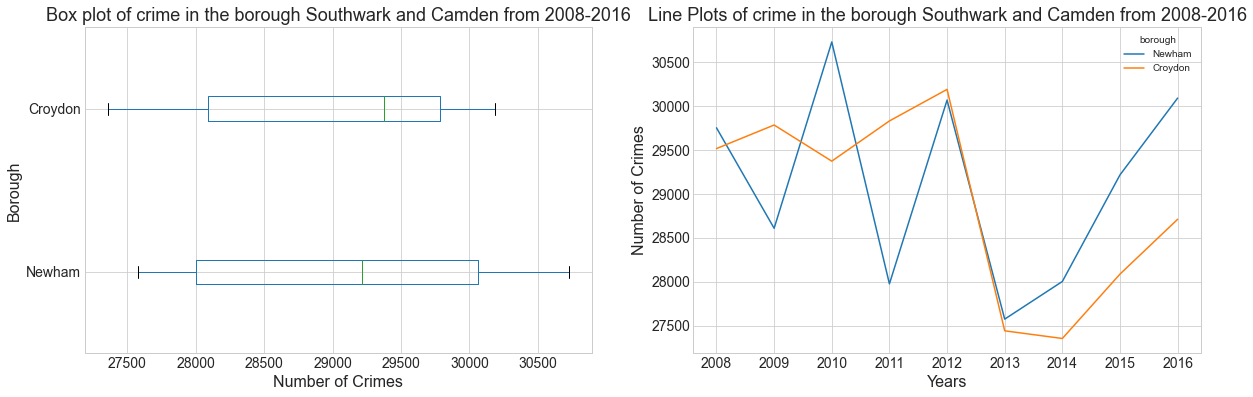

In [45]:
# Creatiing the box plot vs line plot
fig = plt.figure(figsize=(20,6))

ax0 = fig.add_subplot(1,2,1) # (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # (1, row, 2 columns, second plot)

# subplot 1
df_bp.plot(kind="box", vert=False, ax=ax0, fontsize=14)
ax0.set_title("Box plot of crime in the borough Southwark and Camden from 2008-2016", fontsize=18)
ax0.set_xlabel("Number of Crimes", fontsize=16)
ax0.set_ylabel("Borough", fontsize=16)

# subplot2
df_bp.plot(kind="line", ax=ax1, fontsize=14)
ax1.set_title("Line Plots of crime in the borough Southwark and Camden from 2008-2016", fontsize=18)
ax1.set_xlabel("Years", fontsize=16)
ax1.set_ylabel("Number of Crimes", fontsize=16)

plt.show()

Berdasarkan plot diatas terdapat 2 plot yaitu Box plot dan Line Plot pada 2 wilayah di London yaitu Croydon dan Newham. 
- Pada wilayah Newham tingkat kejahatan terendah pada tahun 2013 dan kejahatan teringgi ada pada tahun 2010
- Pada wilayah Croydon tingkat kejahatan terendah pada tahun 2016 dan kejahatan tertinggi ada pada tahun 2012

## Scatter Plot

In [46]:
# Creating the dataset
df_total_crimes = pd.DataFrame(df_borough_crimes)
df_total_crimes.drop("total", axis=1, inplace=True)
df_total_crimes = df_total_crimes.transpose()
df_total_crimes["total"] = df_total_crimes.sum(axis=1)
df_total_crimes.reset_index(inplace=True)
df_total_crimes

borough,year,Westminster,Lambeth,Southwark,Camden,Newham,Croydon,Ealing,Islington,Tower Hamlets,...,Barking and Dagenham,Havering,Harrow,Merton,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London,total
0,2008,47846,31717,33470,32010,29752,29516,28947,26273,23578,...,17656,15395,13774,13875,15305,12943,11106,10661,0,738641
1,2009,48456,31225,30623,31612,28610,29784,28617,25485,21959,...,17713,14538,13948,13561,14445,12240,10618,10163,0,717214
2,2010,48116,31671,31320,31804,30728,29373,31360,24693,23072,...,17130,14957,13945,13595,13166,12032,10601,10171,0,715324
3,2011,54243,33224,30723,33956,27978,29830,29537,24980,24712,...,16686,15496,12801,13548,11325,11068,10896,10155,69,724915
4,2012,59226,33473,30737,31472,30067,30189,28832,26268,26784,...,15990,15965,12803,12856,11669,10948,11168,9956,157,737329
5,2013,53852,31868,31128,28435,27577,27444,25917,23784,26258,...,15759,15089,11914,11595,11552,10057,10439,9191,110,686407
6,2014,47564,31765,28912,27198,28005,27357,24978,24679,25504,...,15426,14734,11909,11596,11844,10443,10456,9288,115,680183
7,2015,47395,33164,30260,29477,29217,28089,26247,27032,27493,...,16346,15870,12601,12273,11990,10598,10413,9738,151,711624
8,2016,48330,34071,31636,29183,30090,28712,27127,27092,29253,...,16741,16903,13153,12755,12840,10658,11074,9983,178,736121


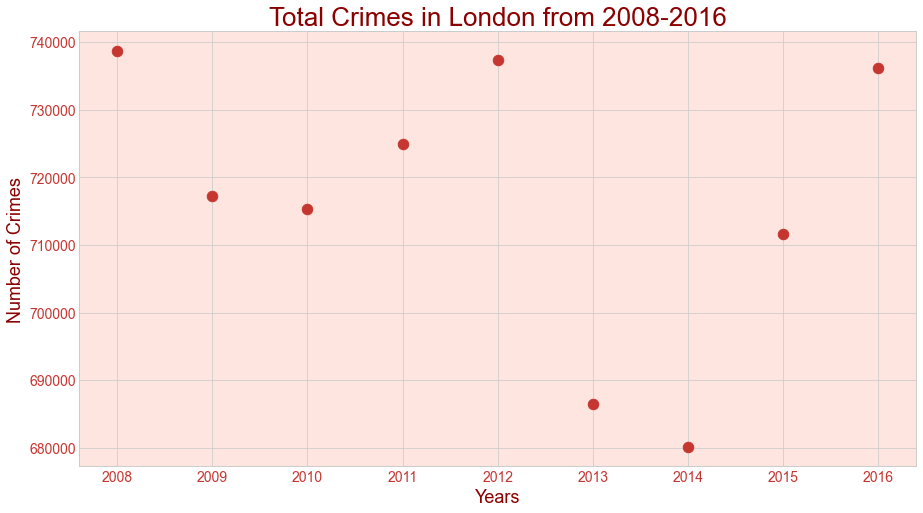

In [47]:
# Creating the Scatter Plot
font = {"family": "sans-serif",
        "color":  "darkred",
        "weight": "normal",
        "size": 26,
        }

df_total_crimes.plot(kind="scatter", x="year", y="total", figsize=(15,8), s=110, color="#c63631")
plt.title("Total Crimes in London from 2008-2016", fontdict=font)
plt.xlabel("Years", fontsize=18, color="darkred")
plt.ylabel("Number of Crimes", fontsize=18, color="darkred")
plt.xticks(color="#c63631",fontsize=14)
plt.yticks(color="#c63631",fontsize=14)
ax = plt.axes()
ax.set_facecolor("#ffe5df")
plt.show()

Berdasarkan plot diatas, menunjukkan total kejahatan di London disetiap tahunnya.
- Tingkat kejahatan tertinggi ada pada tahun 2008, dengan total 738641 kasus
- Tingkat kejahatan terendah ada pada tahun 2014, dengan total 680000 kasus

In [48]:
# Creating the dataset

# Memilih tahun 2016
y_2016 = df.loc[df["year"] == 2016]

# Groupby month
sum_month=y_2016.groupby(['month']).sum()
sum_month["month_name"] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sum_month[["month_name", "no_of_crimes"]]

,month_name,no_of_crimes
month,,
1,Jan,58847
2,Feb,56697
3,Mar,59167
4,Apr,58637
5,May,63990
6,Jun,62262
7,Jul,65519
8,Aug,62666
9,Sep,61412


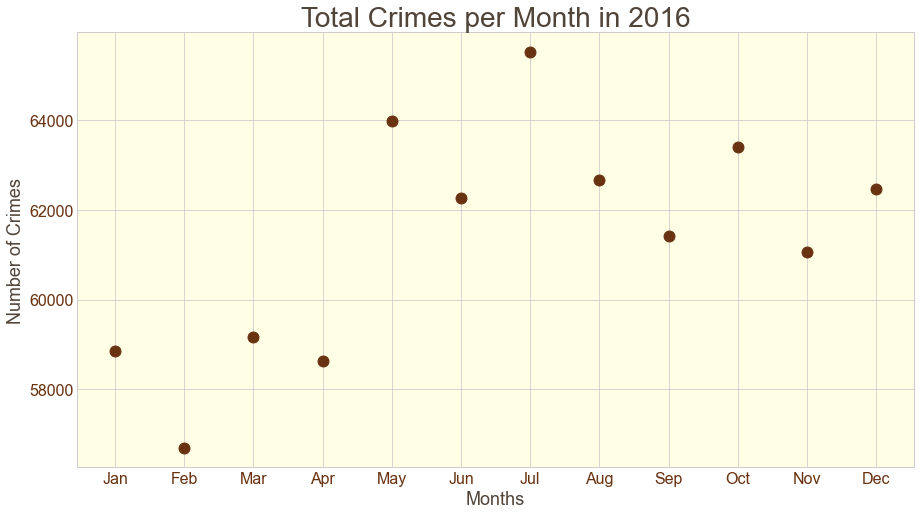

In [49]:
# Creating the Scatter Plot
font = {"family": "sans-serif",
        "color":  "#514439",
        "weight": "normal",
        "size": 28,
        }

sum_month.plot(kind="scatter", x="month_name", y="no_of_crimes", figsize=(15, 8), s=120, color="#693211")
plt.title("Total Crimes per Month in 2016", fontdict=font)
plt.xlabel("Months", fontsize=18, color="#514439")
plt.ylabel("Number of Crimes", fontsize=18, color="#514439")
plt.xticks(color="#693211",fontsize=16)
plt.yticks(color="#693211",fontsize=16)
ax = plt.axes()
ax.set_facecolor("#ffffe6")
plt.show()

Berdasarkan plot diatas, menunjukkan total kejahatan di London di setiap bulannya pada tahun 2016.
- Total kejahatan di setiap bulannya ada pada rentang 56000 hingga 66000 kasus.
- Kejahatan tertinggi ada pada bulan Juli, dengan total lebih dari 64000 kasus.
- Kejahatan terendah ada pada bulan Februari, dengan total sekitar 56000 kasus.

## WordClouds

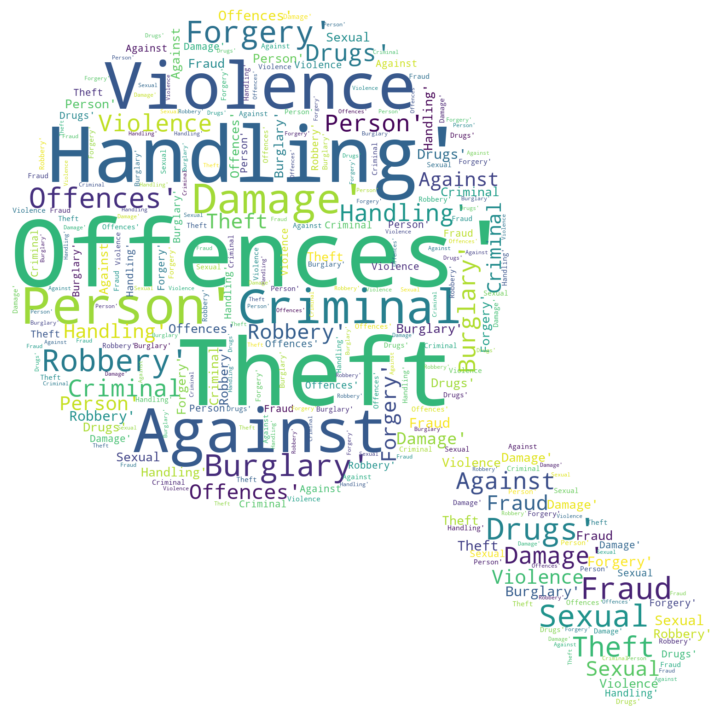

In [57]:
text = df["major_category"].value_counts().to_dict() 

# Generate a word cloud image
mask = np.array(Image.open("dataset/mask.png"))
stop_words = ["and", "or", "the", "other", " '", "Person", "Notifiable"]

wordcloud = WordCloud(scale=3,
                      background_color = "white", 
                      max_words = 1000, 
                      relative_scaling="auto",
                      stopwords = stop_words,
                      repeat=True,
                      mask=mask).generate_from_text(str(text))


# Ceate image as cloud
fig=plt.figure()
fig.set_figwidth(13)
fig.set_figheight(13)
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear", cmap=plt.cm.gray) 
plt.axis("off") 
plt.show()


Pada plot diatas menampilkan kategori-kategori kejahatan dengan bentuk lup (kaca pembesar) dimana lup identik dengan ikon detektif dan merupakan sebuah alat yang wajib dibawa oleh para Detektif.
- Kategori kejahatan yang ditampilkan berdasarkan "major_category" yang ada di London.
- Kata yang terlihat lebih besar merupakan kategori kejahatan dengan jumlah yang tinggi di London, yaitu seperti Theft, Offences, Violence dan lainnya.
      

## Folium Maps

In [51]:
# Creating the dataset
df_map = df_borough_crimes[["total"]]
df_map.reset_index(inplace=True)
df_map.head()

year,borough,total
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


In [52]:
# Geojson file
jsonmap ="dataset/london_boroughs.geojson.txt"
london_boroughs = json.load(open(jsonmap))

# Create a plain world map
latitude = 51.509865
longitude = -0.118092
world_map = folium.Map(location=[latitude, longitude], zoom_start = 12, tiles = "cartodbpositron")
    
# Generate choropleth map 
world_map.choropleth(geo_data=london_boroughs,  
                     data = df_map, 
                     columns = ["borough", "total"],
                     key_on = "feature.properties.name",
                     fill_color = "YlOrRd",
                     fill_opacity = 0.6, 
                     line_opacity=0.3, 
                     legend_name = "Crime rate in boroughs of london",
                     smooth_factor=0)

# Add tile layers to the map
tiles = ["stamenwatercolor", "openstreetmap", "stamenterrain", "cartodbpositron"]
for tile in tiles:
    folium.TileLayer(tile).add_to(world_map)
    
# Create a layer control
folium.LayerControl().add_to(world_map)

# Display map
world_map

Berdasarkan plot diatas, menunjukkan tingkat kejahatan di setiap wilayah di London. Pada crime rates diatas juga menggunakan skema warna berurutan, terlihat bahwa jika semakin kuat warnanya maka tingkat kejahatan pada wilayah tersebut semakin tinggi. dan jika warna semakin lemah maka tingkat kejahatan pada wilayah tersebut cukup rendah.

# Analisis Kesimpulan

Berdasarkan hasil dari visualisasi yang telah dibuat diatas, telah dibuat kesimpulan sebagaimana berikut:
- Kejahatan tertinggi terjadi pada tahun 2008, dengan total 738641 kasus.
- Kejahatan terendah terjadi pada tahun 2014, dengan total 680183 kasus.
- Lima wilayah (Borough) dengan kejahatan tertinggi yaitu Westminster, Lambeth, Southwark, Camden, dan Newham.
- Lima wilayah (Borough) dengan kejahatan terendah yaitu Bexley, Sutton, Richmond upon Thames, Kingston upon Thames, dan City of London.
- "Westminster" memiliki tingkat kejahatan tertinggi daripada wilayah lainnya dengan total 455028 kasus.
- "City of London" memiliki tingkat kejahatan terendah daripada wilayah lainnya dengan total 780 kasus.
- Berdasarkan "Major Category", Theft and Handling merupakan tingkat kejahatan tertinggi dengan total 5323722 kasus, dan Sexual Offences merupakan tingkat kejahatan terendah dengan total 2546 kasus.
- Berdasarkan "Minor Category", Other Theft merupakan tingkat kejahatan tertinggi dengan total 980085 kasus, dan Rape merupakan tingkat kejahatan terendah dengan total 268 kasus.